In [1]:

# import all necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from skimage import exposure
import rasterio

In [2]:
# open image file as PIL image object
src_file = '/Users/alexrojas/Documents/Data/NewYork/Imagery/m_4007307_se_18_1_20170809/porpoise_channel.tif'
pil_image = Image.open(src_file)

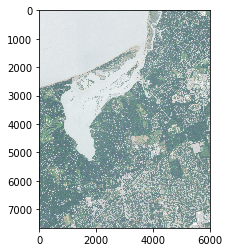

In [3]:
plt.imshow(pil_image)
plt.show()

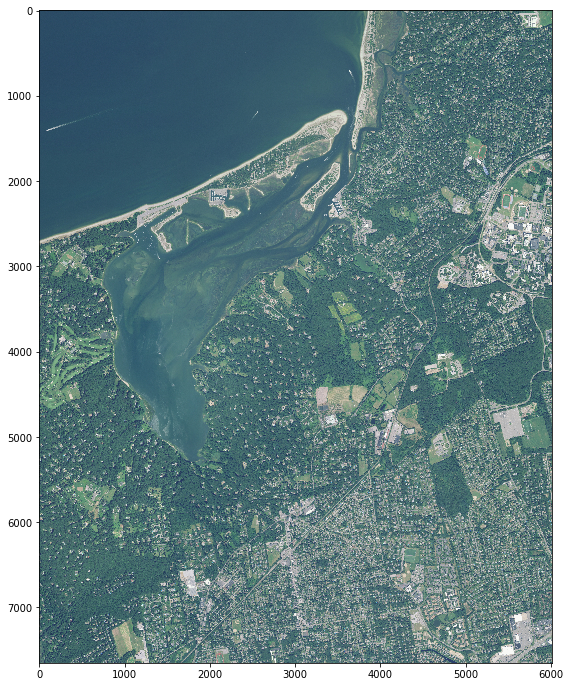

In [4]:
# Seperate bands (PIL image objects) and convert to numpy arrays
r_pil, b_pil, g_pil, nir_pil = Image.Image.split(pil_image)
r_array = np.array(r_pil)
g_array = np.array(g_pil)
b_array = np.array(b_pil)
nir_array = np.array(nir_pil)

# create an rgb array and an rgb PIL object
rgb_array = np.dstack((r_array,b_array,g_array))
rgb_pil = Image.fromarray(rgb_array)

plt.figure(figsize=(16,12))
plt.imshow(rgb_pil)
plt.show()

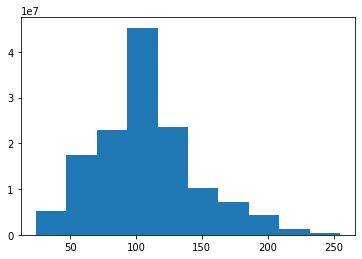

In [29]:
# plot rgb array histogram
plt.hist(rgb_array.ravel())
plt.show()

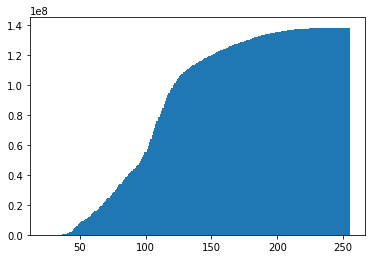

In [30]:
# plot rgb array cdf
plt.hist(rgb_array.ravel(), bins=255, cumulative=True)
plt.show()

//anaconda3/lib/python3.7/site-packages/skimage/exposure/exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


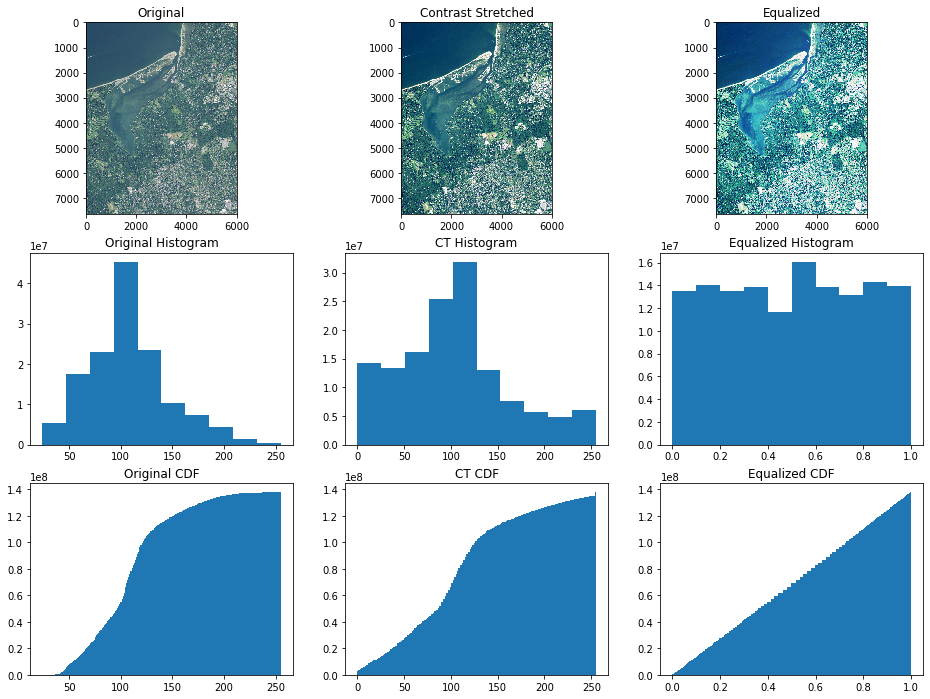

In [5]:
# contrast stretching
p2 = np.percentile(rgb_array, 2)
p98 = np.percentile(rgb_array, 98)
image_ct = exposure.rescale_intensity(rgb_array, in_range=(p2, p98))

# histogram equalization
image_eq = exposure.equalize_hist(rgb_array)

# Show the images
fig = plt.figure(figsize=(16, 12))

# Subplot for original
a=fig.add_subplot(3,3,1)
imgplot=plt.imshow(rgb_array)
a.set_title('Original')

# Subplot for contrast stretched image
a=fig.add_subplot(3,3,2)
imgplot=plt.imshow(image_ct)
a.set_title('Contrast Stretched')

# Subplot for equalized image
a=fig.add_subplot(3,3,3)
imgplot=plt.imshow(image_eq)
a.set_title('Equalized')

# Subplots for histograms
a=fig.add_subplot(3,3,4)
imgplot=plt.hist(rgb_array.ravel())
a.set_title('Original Histogram')

a=fig.add_subplot(3,3,5)
imgplot=plt.hist(image_ct.ravel())
a.set_title('CT Histogram')

a=fig.add_subplot(3,3,6)
imgplot=plt.hist(image_eq.ravel())
a.set_title('Equalized Histogram')

# Subplots for CDFs
a=fig.add_subplot(3,3,7)
imgplot = plt.hist(rgb_array.ravel(), bins=255, cumulative=True)
a.set_title('Original CDF')

a=fig.add_subplot(3,3,8)
imgplot = plt.hist(image_ct.ravel(), bins=255, cumulative=True)
a.set_title('CT CDF')

a=fig.add_subplot(3,3,9)
imgplot = plt.hist(image_eq.ravel(), bins=255, cumulative=True)
a.set_title('Equalized CDF')

plt.show()

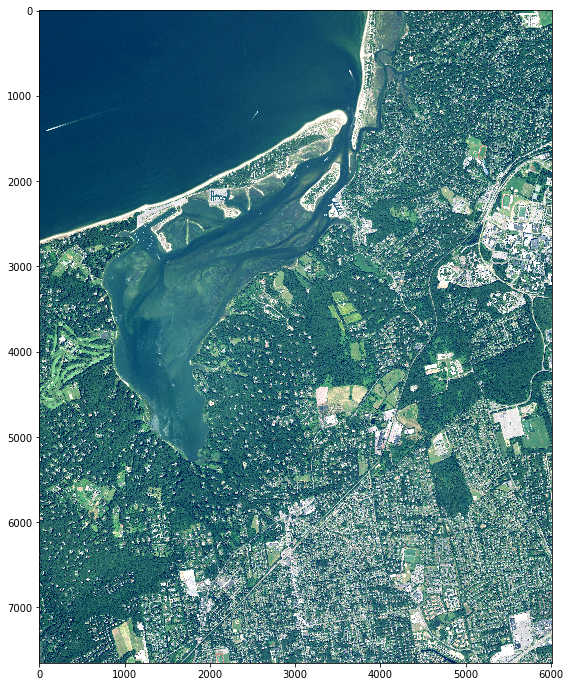

In [8]:
plt.figure(figsize=(16,12))
plt.imshow(image_ct)
plt.show()

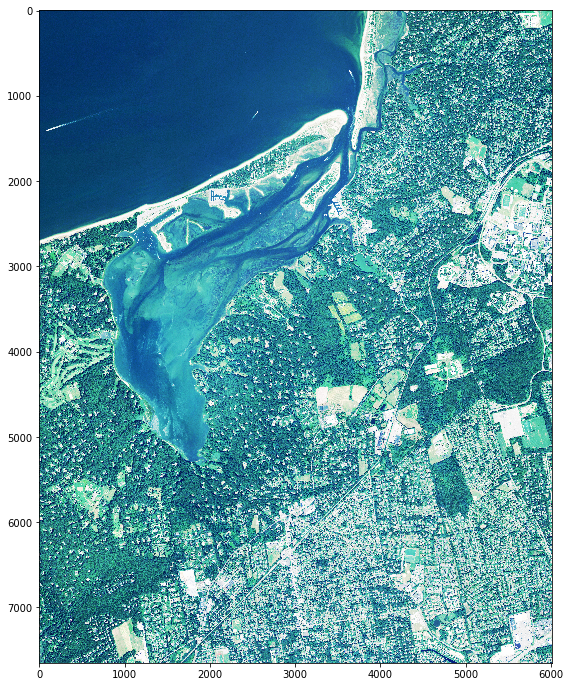

In [9]:
plt.figure(figsize=(16,12))
plt.imshow(image_eq)
plt.show()

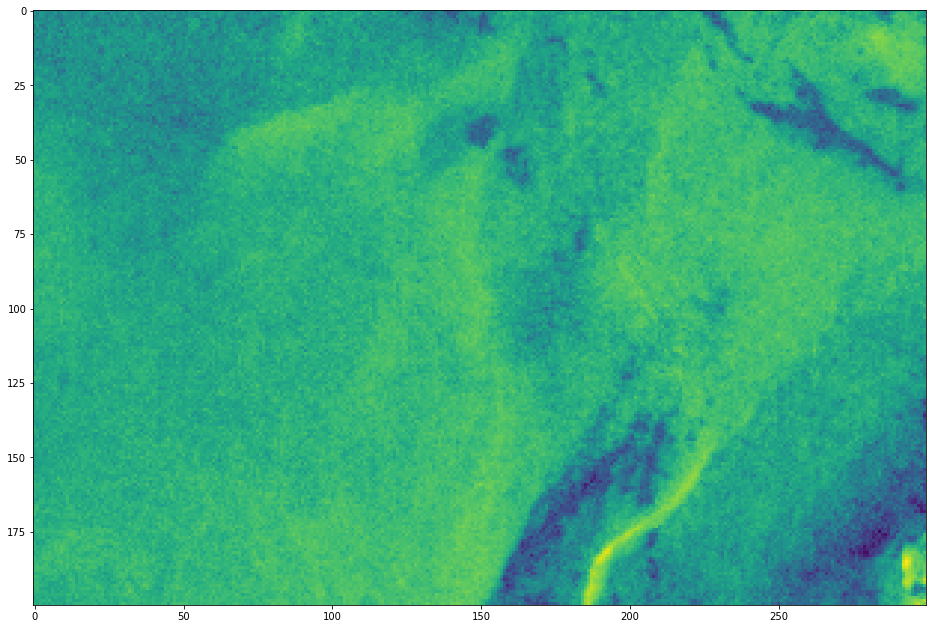

In [58]:
mud_flat = image_eq[3700:3900,1600:1900]

fig = plt.figure(figsize=(16,12))
# plot original
imgplot=plt.imshow(mud_flat[:,:,1])
plt.show()

In [82]:
print(mud_flat[:,:,2].max())

0.8988709074226275


In [34]:
print(mud_flat.shape)

(200, 300, 3)


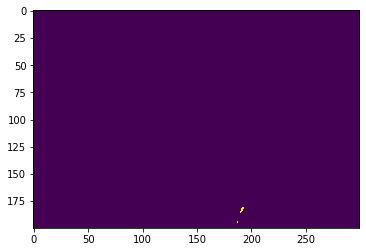

In [88]:
plt.imshow(mud_flat[:,:,0]>.7)
plt.show()